# Analysis

In [38]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_model_performance(json_path):
   with open(json_path, 'r') as f:
       data = json.load(f)
   
   df = pd.DataFrame(data['models'])
   df['iteration'] = ['Baseline' if arch == 'Baseline SpectrVelCNNRegr' 
                     else f'Iter {i}' for i, arch in enumerate(df['architecture'])]
   
   df['iter_num'] = df['iteration'].apply(lambda x: 0 if x == 'Baseline' 
                                        else int(x.split()[1]))
   df = df.sort_values('iter_num')
   
   plt.figure(figsize=(12, 8))
   plt.rcParams.update({'font.size': 14})
   plt.grid(True, alpha=0.3)
   
   plt.plot(df['parameters'], df['rmse'], 'gray', alpha=0.3, zorder=1, linewidth=3)
   plt.scatter(df['parameters'], df['rmse'], s=200, zorder=2)
   
   for _, row in df.iterrows():
       plt.annotate(row['iteration'], (row['parameters'], row['rmse']), 
                   xytext=(10, 5), textcoords='offset points', fontsize=16)
   
   baseline = df[df['iteration'] == 'Baseline'].iloc[0]
   best_idx = df['rmse'].idxmin()
   best_model = df.loc[best_idx]
   
   plt.scatter([baseline['parameters']], [baseline['rmse']], 
              c='black', s=300, marker='*', zorder=3,
              label=f'Baseline (RMSE: {baseline["rmse"]:.3f})')
   
   plt.scatter([best_model['parameters']], [best_model['rmse']], 
              c='red', s=300, marker='*', zorder=3,
              label=f'Best (RMSE: {best_model["rmse"]:.3f})')
   
   plt.xscale('log')
   plt.xlabel('Number of Parameters', fontsize=20)
   plt.ylabel('RMSE', fontsize=20)
   plt.legend(loc='best', fontsize=14)
   
   x_ticks = [6e6, 1e7, 2e7, 3e7, 4e7]
   plt.xticks(x_ticks, [f'{x/1e6:.0f}M' for x in x_ticks], fontsize=14)
   plt.yticks(fontsize=14)
   plt.grid(True, which='major', alpha=0.3)
   
   plt.tight_layout()
   plt.show()

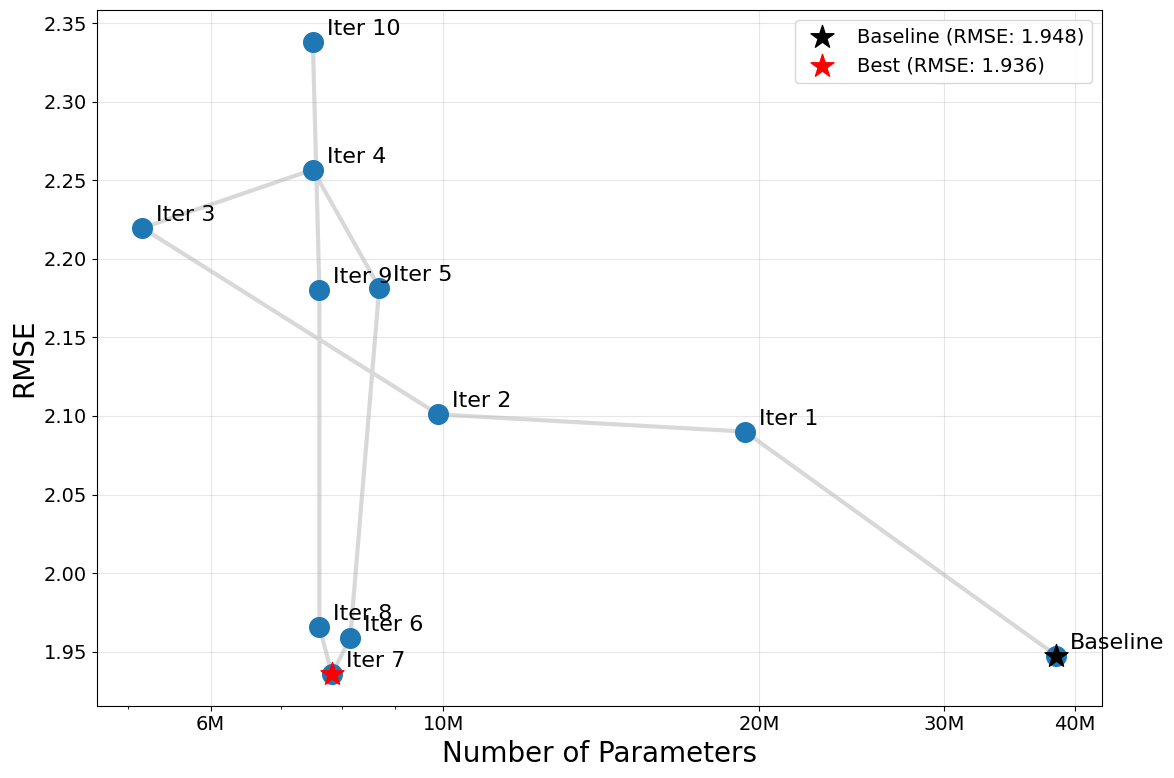

In [39]:
path = r"../2ndRunStuff/model_performances_20241204_174727.json"
plot_model_performance(path)

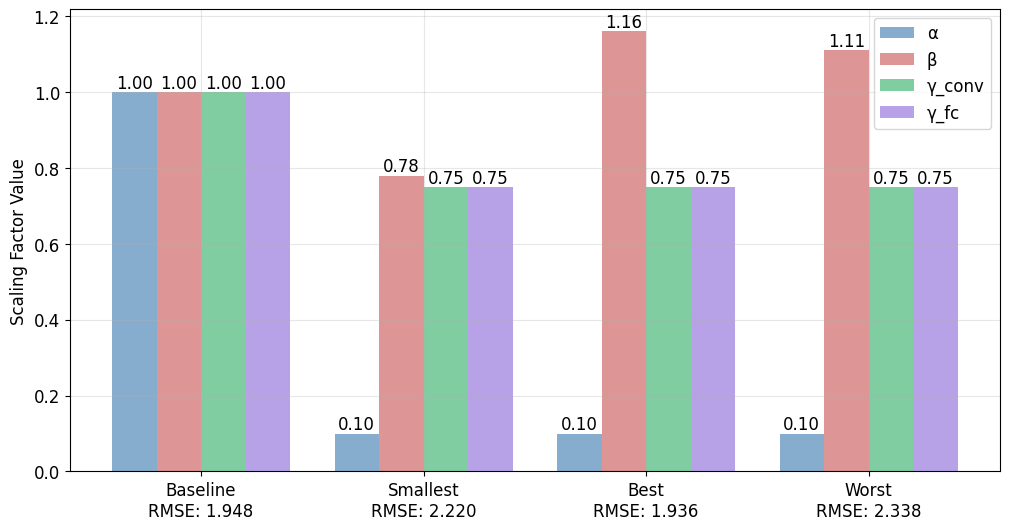

In [33]:
def plot_scaling_comparison():
    import matplotlib.pyplot as plt
    import numpy as np

    models = {
        'Baseline': {'α': 1.00, 'β': 1.00, 'γ_conv': 1.00, 'γ_fc': 1.00, 'rmse': 1.9475},
        'Smallest': {'α': 0.10, 'β': 0.78, 'γ_conv': 0.75, 'γ_fc': 0.75, 'rmse': 2.2196},
        'Best': {'α': 0.10, 'β': 1.16, 'γ_conv': 0.75, 'γ_fc': 0.75, 'rmse': 1.9357},
        'Worst': {'α': 0.10, 'β': 1.11, 'γ_conv': 0.75, 'γ_fc': 0.75, 'rmse': 2.3382}
    }

    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(4)
    width = 0.2
    
    # Using darker colors but with alpha for transparency
    colors = ['#4682B4', '#CD5C5C', '#3CB371', '#9370DB']  # Steel blue, Indian red, medium sea green, medium purple
    
    for i, factor in enumerate(['α', 'β', 'γ_conv', 'γ_fc']):
        values = [model[factor] for model in models.values()]
        bars = ax.bar(x + i*width, values, width, label=factor, color=colors[i], alpha=0.65)
        for j, v in enumerate(values):
            ax.text(x[j] + i*width, v, f'{v:.2f}', ha='center', va='bottom')

    ax.set_ylabel('Scaling Factor Value')
    ax.set_xticks(x + width*1.5)
    ax.set_xticklabels([f"{name}\nRMSE: {params['rmse']:.3f}" for name, params in models.items()])
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    return fig

# Example usage:
fig = plot_scaling_comparison()
plt.show()

In [24]:
from SearchNet import calculate_params_precise

# Best model (RMSE: 1.9357)
best_params = calculate_params_precise(
    alpha=0.10, 
    beta=1.16, 
    gamma_conv=0.75, 
    gamma_fc=0.75
)

# Worst model (RMSE: 2.3382)
worst_params = calculate_params_precise(
    alpha=0.10, 
    beta=1.11, 
    gamma_fc=0.75, 
    gamma_conv=0.75
)

print(f"Best model parameters: {best_params:,}")
print(f"Worst model parameters: {worst_params:,}")

Best model parameters: 7,832,382
Worst model parameters: 7,510,170
